## Keras: A high level neural network library

In this exercise we will revisit classification using simple neural networks. To do so we will use Keras, a popular neural network package. Keras is a high level library that allows rapid prototyping of neural networks due to its precompiled layers, just as Scikit-learn contains a number of prebuilt classifiers.


## Keras

Detailed instructions can be found at https://keras.io.


To start the demo, we have a 2D dataset so we can visualize what the network is doing.

Neural networks are so popular now due to their ability to quickly learn nonlinear boundaries. So, we have an example that would be impossible for a linear classifier and demonstrate how a neural network can be used to solve this. As you can see, in the dataset below there is no straight line that you can draw that perfectly separates the red and blue classes

In [ ]:
from google.colab import files 
src = list(files.upload().values())[0]
open('utils.py','wb').write(src)
import utils

Saving utils.py to utils.py


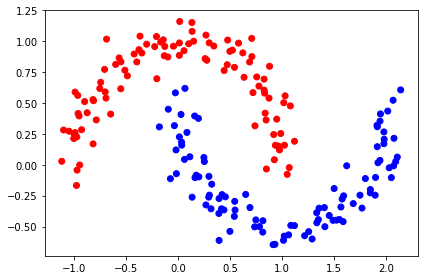

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils import lenses_dataset, get_colors


X, y = lenses_dataset()

# For consistent color plotting:

cmap=get_colors(y)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.tight_layout()
plt.show()

Let's split it into a training and testing set 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10) 

We will build a Perceptron using Keras as an example-- Recall that a perceptron is a 0 hidden layer neural network with a single output unit. In Keras terms, it's a single Dense layer with 1 unit. 

We will build this perceptron with a sigmoidal output (so it outputs a probability of class 1) and the binary_crossentropy loss function (which corresponds to sigmoid).

In [ ]:
# Relevant imports
from keras.models import Sequential
# Keras refers to an architecture in which the outputs of 
# one layer are the inputs to the next as "Sequential"
from keras.layers import Dense
# Everything we've talked about in class so far is referred to in 
# Keras as a "dense" connection between layers, where every input 
# unit connects to a unit in the next layer
from tensorflow.keras.optimizers import SGD
# SGD is the learning algorithm we will use

# Exercise 1:

Q1. Let's first create neural network with 1 layer 

To add a layer to the architecture, you would simply use .add(LAYER).

Each "input_dim" of each layer should be the number units in the previous layer (in this case the input), and the number of "units" should be the number of outputs of the layer (in this case it will be 1).

In [ ]:
### YOUR CODE HERE ###
perceptron = Sequential()
perceptron.add(
    Dense(1, input_dim = X_train.shape[1], activation = "sigmoid")
)

Now we specify how to optimize the neural network. We mentioned gradient descent and stochastic gradient descent in class. Let's use the latter here and compile the model. We also specify the loss function as "binary_crossentropy". 

In [ ]:
sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
perceptron.compile(loss="binary_crossentropy", optimizer=sgd)


Q2. Now we train the built perceptron with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
perceptron.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4533
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4528
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4521
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4512
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4503
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4492
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4482
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4471
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4461
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.4450
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4440
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4430
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

Q3. Compute accuracy by implementing your own function. 

In [ ]:
y_preds = perceptron.predict(X_test)
y_preds = np.round(y_preds, 0)

2/2 [==============================] - 0s 6ms/step


In [ ]:
### Build your own function to calculate accuracy###
def accuracy(y, y_preds):
    tp, fp, tn, fn = 0, 0, 0 ,0
    for i in range(len(y_preds)):
        if y_preds[i] == y[i] and y_preds[i] == 1:
            tp += 1
        elif y_preds[i] != y[i] and y_preds[i] == 1:
            fp += 1
        elif y_preds[i] == y[i] and y_preds[i] == 0:
            tn += 1
        else:
            fn += 1
    return (tp+tn)/(tp+tn+fn+fp)

In [ ]:
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

The accuracy is: 0.825


67/67 [==============================] - 0s 1ms/step


Text(18.75, 0.5, 'Test')

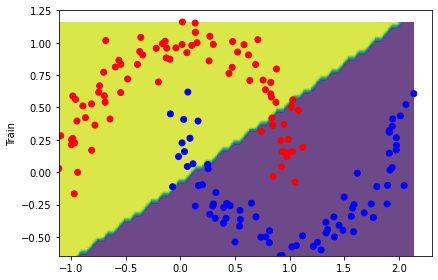

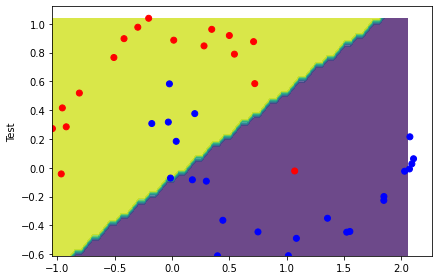

In [ ]:
from utils import visualize_2d_classification
f, ax = visualize_2d_classification(perceptron, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(perceptron, X_test, y_test)
ax.set_ylabel("Test")

Recall that a perceptron is nothing more than a linear classifier, which is trying to separate our data using a line. It turns out that the introduction of hidden layers allows us to draw "lines" in higher dimensions, which, when mapped back into our original 2d space,  may look nonlinear.

# Exercise 2:

For this exercise, use Keras to create a 2-layer neural network by completing build_one_output_model(). We will then add one hidden layer of 2 units and an output layer of 1 unit (corresponding to our classes- sometimes referred to as a "readout" layer). 

The model has already been initialized and the optimizer and loss function have been defined for you.

For your intermediate layers, use "relu" as the activation function, and "sigmoid" (as the demo above) for your output layer.

In [ ]:
# Keras uses the Sequential model for linear stacking of layers.
# That is, creating a neural network is as easy as (later)
# defining the layers!
from keras.models import Sequential
# Everything we've talked about in class so far is referred to in
# Keras as a "dense" connection between layers, where every input
# unit connects to a unit in the next layer

from keras.layers import Dense
# SGD is the learning algorithm we will use
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

Q1. Create a 2 layer neural network by completing build_one_output_model().

In [ ]:
def build_one_output_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    # Add a input hidden layer with 2 units 
    model.add(
        Dense(2, input_dim=X_train.shape[1], activation='relu')
    )

    # Add a final output layer with 1 unit 
    model.add(
        Dense(1, activation='sigmoid')
    )
    

    # Specify SGD optimizer with appropriate values in learning_rate, decay and momentum.
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent


    # compile the model with "binary_crossentropy" loss and SGD optimizer. 
    model.compile(loss="binary_crossentropy", optimizer=sgd)

    return model


In [ ]:
model = build_one_output_model()

Q2. Fit your model by training set with appropriate epochs and batch_size.

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5316
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5298
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5280
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5264
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5245
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5228
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5210
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5194
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5176
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5160
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5142
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5126
Epoch 13/100
5/5 [==============================] - 0s 3ms/st

Q3. Compute accuracy by using your own function.

In [ ]:
### YOUR CODE HERE ###
y_preds = model.predict(X_test)
y_preds = np.round(y_preds, 0)
print(f'The accuracy is: {accuracy(y_test, y_preds)}')

2/2 [==============================] - 0s 5ms/step
The accuracy is: 0.85


67/67 [==============================] - 0s 3ms/step


Text(18.75, 0.5, 'Test')

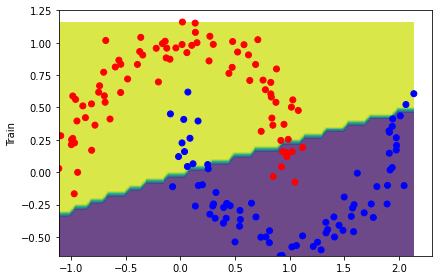

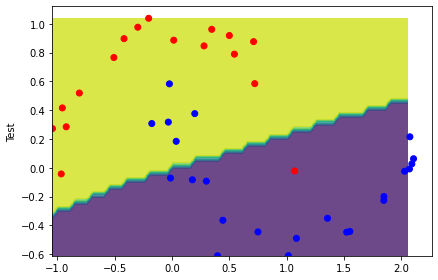

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")


It is actually quite rare for a classification neural network to have a single output unit as we've implemented above. Usually we have a $k$ unit output layer, where $k$ is the number of classes. This is typically done because when combined with the "softmax" activation function , the activity of each unit corresponds with the probability of that class. This allows us to easily extend to multiclass classification.

Now we will still work with two units, but map them to two output units rather than 1. class 0 will be [1, 0], and class 1 will be [0, 1]. This operation is referred to as "one hot encoding". 

In [ ]:
# Before we can fit the network, we need to one-hot vectorize our response.
# There is a keras method for that.
from tensorflow.keras.utils import to_categorical

y_train_vectorized = to_categorical(y_train)

In [ ]:
print("Label | One-hot")
for i in range(10):
    print("{} | {}".format(y_train[i], y_train_vectorized[i]))

Label | One-hot
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
1 | [0. 1.]
1 | [0. 1.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]
0 | [1. 0.]


The one hot encoded vectors will serve as future labels for our models. 

# Exercise 3: 

Q1.Implement build_classification_model() that returns a sequential model that takes an input of size 2, passes it to a hidden layer of size 10, then a hidden layer of size 5, then a readout layer of size 2. 


As before, use the "relu" activation function for hidden layers, but since we have multiple output units, use the "softmax" activation for the final layer.

We use SGD optimizer and "categorical_crossentropy" loss function to compile the model.

In [ ]:
def build_classification_model():
    model = Sequential()

    ### YOUR CODE HERE ###
    model.add(Dense(10, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(Dense(5, input_dim = X_train.shape[1], activation = 'relu'))
    model.add(Dense(2, input_dim = X_train.shape[1], activation = 'softmax'))
    
    sgd = SGD(learning_rate = 0.001, decay = 1e-7, momentum = 0.9)
    
    model.compile(loss="categorical_crossentropy", optimizer=sgd)
    
    return model

In [ ]:
model = build_classification_model()

Q2. Fit your model by training set

In [ ]:
### YOUR CODE HERE ###
model.fit(X_train, y_train_vectorized, batch_size = 32, epochs = 100)

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6119
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.6086
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.6036
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5977
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5912
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5846
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5785
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5729
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5672
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5622
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.5568
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.5521
Epoch 13/100
5/5 [==============================] - 0s 5ms/st

Q3. Compute accuracy by using your own function

In [ ]:
y_preds = model.predict(X_test)[:,1]

y_preds = np.round(y_preds, 0)

print(f'The accuracy is: {accuracy(y_test, y_preds)}')

2/2 [==============================] - 0s 6ms/step
The accuracy is: 0.85


67/67 [==============================] - 0s 1ms/step


Text(18.75, 0.5, 'Test')

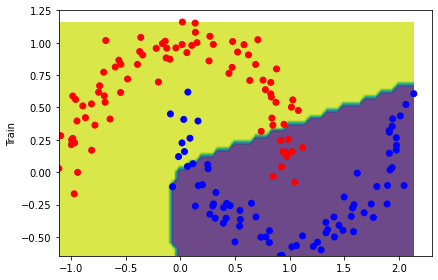

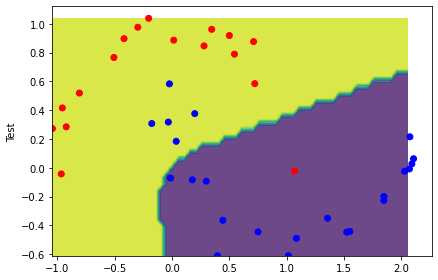

In [ ]:
# And visualize how your model did
f, ax = visualize_2d_classification(model, X_train, y_train)
ax.set_ylabel("Train")
f, ax = visualize_2d_classification(model, X_test, y_test)
ax.set_ylabel("Test")

# Exercise 4:
### Short answer-questions

Q1. The learning rate is an important parameter for gradient descent. Please briefly describe a possible issue if we choose too high a learning rate for full batch gradient descent (GD). Also, please briefly describe a possible issue if we choose too high a learning
rate for stochastic gradient descent (SGD), but is not a problem in the full batch setting.



Ans-

*GD*: Because gradient descent is the process of taking successive steps in the direction of the local minimum, having too high of a learning rate can possibly lead to us jumping over the local minima (we overshoot). This can lead to osculations around the minimum or divergence.

*SGD*: The key difference between SGD and GD is that GD takes the whole dataset into account while SGD computes the gradient using a single sample. The downside to SGD as compared to GD is that once it reaches close to the minimum value, it bounces around which gives us a good value for model parameters but is not optimal which can be solved by reducing the learning rate at each step. SGD also has a noisier convergence path to the minimum than GD as it is not calculating the actual gradient but an approximation.

Q2. Please give an example in the data augmentation methods that is helpful for classifying images of dogs and cats, but not for classifying handwritten digit.

Ans- 

Data augmentation methods are techniques to increase the diversity of the training dataset by creating copies of the existing data and making small modifications to it. There are many different methods available, such as adding noise, cropping, rotation, saturation etc.

For the particular case above, one data augmentation method that would be useful for dog/cat images and not handwritten digits is rotation.

Rotating the image of dogs and cats does not change its classification type (i.e. whether it is a dog or cat image). However, for handwritten digit, rotating the image (for example rotating the image of '6' by 180 degrees changes it to a '9') might change its meaning and therefore its classification.

Q3. Suppose we have the following two neural networks containing fully-connected layers only. 
<div>
<img src="https://ucla.box.com/shared/static/kgninjcbqpztz680q47emsluvituw4ga.jpg" width="300"/>
</div>
Please give one advantage of A over B, and one advantage of B over A.

Ans-

Advantage of A over B:
- Less time consuming to implement (less computational heavy)
- Lesser likelihood of overfitting
- Allows for datasets with smaller number of observations

Advantage of B over A:
- Extra layer allows for non-linear transformations
- Performance on training dataset is usually higher


# Exercise 5:

Now let's revisit the classification problem (Dataset 1) in Homework 2. Build a neural network to predict the output in the default payment dataset. The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

"CreditDefault_training.csv" has 3985 records. 

"CreditDefault_Xtest.csv" contains contains 1000 rows and 14 columns. This is the test set which only contains the features.

Q1. Read the data<br/>
- Apply standardization to continuous values<br/> 
- Convert categorical variables and the target "default.payment.next.month" into one-hot encodings. <br>
- Split data into train and validation set<br/>

In [ ]:
import numpy as np
import pandas as pd
import io

In [ ]:
### YOUR CODE HERE ###
from google.colab import files
import io

uploaded = files.upload()

Saving CreditDefault_Xtest.csv to CreditDefault_Xtest.csv
Saving CreditDefault_training.csv to CreditDefault_training.csv


In [ ]:
df_train = pd.read_csv(io.BytesIO(uploaded['CreditDefault_training.csv']))
df_test = pd.read_csv(io.BytesIO(uploaded['CreditDefault_Xtest.csv']))

In [ ]:
# Split data into X (features) and y (target)
# Please make sure y is in a one-hot representation
# WRITE CODE HERE
X=df_train.drop(['default.payment.next.month'],axis=1)
y=df_train['default.payment.next.month']

# for y, perform one hot encoding
y=pd.get_dummies(y)
y

,0,1
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
3980,1,0
3981,1,0
3982,1,0
3983,0,1


In [ ]:
# Standardization of continous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cat_col=['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for i in X.columns:
  if (i not in cat_col):
    X[i]=scaler.fit_transform(X[[i]]).ravel()
    df_test[i]=scaler.transform(df_test[[i]]).ravel()



In [ ]:
# one hot encoding
X2 =pd.get_dummies(X,columns=cat_col)

df_test2=pd.get_dummies(df_test,columns=cat_col)
df_test3 = df_test2.reindex(columns = X2.columns, fill_value=0)

In [ ]:
# Split data into training and validation set (the code has been provided)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X2, y, test_size=0.3, random_state=42)

In [ ]:
# Print out the shape of X_train
X_train.shape

(2789, 82)

Q2. Build a neural network to predict the output in the "CreditDefault_training.csv". The architecture choice is up to you, but you are required to use Dense layers and dropout layers only.

You can try different number of layers, different number of units in layers and experiment with hyperparameters. 

To include regularization, you can include a dropout layer after a hidden layer. In dropout layer, you can randomly set a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

Please use 'relu' activation function for all intermediate layers.

Please build your model in the build_final_model() function

In [ ]:
def build_final_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    
    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(82, input_dim = X_train.shape[1], activation='relu'))

    # set second hidden layer as average of input and output layer
    model.add(Dense(42, activation='relu'))

    # Drop out layer
    model.add(Dropout(0.2))
    
    # Continues the process 
    model.add(Dense(21, activation='relu'))

    # Finally, add a readout layer
    model.add(Dense(2, activation='softmax'))
    
    ######################
    sgd = SGD(learning_rate=0.001, decay=1e-7, momentum=.9)  # Stochastic gradient descent
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=["accuracy"])
    

    return model

In [ ]:
model = build_final_model()

Q3. Fit the model by training set with epochs=100, batch_size=32

In [ ]:
### YOUR CODE HERE ###
trained5 = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
88/88 [==============================] - 1s 2ms/step - loss: 0.5917 - accuracy: 0.7469
Epoch 2/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5370 - accuracy: 0.7666
Epoch 3/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5232 - accuracy: 0.7666
Epoch 4/100
88/88 [==============================] - 0s 2ms/step - loss: 0.5085 - accuracy: 0.7669
Epoch 5/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.7673
Epoch 6/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4889 - accuracy: 0.7669
Epoch 7/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4803 - accuracy: 0.7680
Epoch 8/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4727 - accuracy: 0.7695
Epoch 9/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.7702
Epoch 10/100
88/88 [==============================] - 0s 2ms/step - loss: 0.4652 - accuracy: 0.7759
Epoch 11/

Q4. Obtain predictions on validation set and print accuracy, precision & recall and F1 score.

F1 = 2 * (precision * recall) / (precision + recall)

In [ ]:
# Predictions
y_preds5 = model.predict(X_val)
y_preds5 = y_preds5.round()

38/38 [==============================] - 0s 2ms/step


In [ ]:
# convert to numpy array for next step of processing later
y_val_arr = y_val.to_numpy()

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [0, 1],
       [1, 0],
       [1, 0]], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve

# reduce to 1d array
y_preds5_1d = y_preds5[:, 0]
y_val_1d = y_val_arr[:, 0]

# accuracy
accuracy = accuracy_score(y_val_1d, y_preds5_1d)
print(f'The accuracy is: {accuracy}')

# recall
recall = recall_score(y_val_1d, y_preds5_1d)
print(f'The recall is: {recall}')

# precision
precision = precision_score(y_val_1d, y_preds5_1d)
print(f'The precision is: {precision}')

# f1-score
f1 = f1_score(y_val_1d, y_preds5_1d)
print(f'The f1 is: {f1}')



The accuracy is: 0.8035117056856187
The recall is: 0.9006479481641468
The precision is: 0.8536335721596725
The f1 is: 0.8765107724645297


Q5. Plot the ROC curve by giving appropriate names for title and axes.

ROC AUC: 0.685509


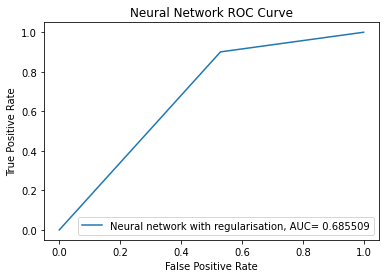

In [ ]:
# Plot the ROC curve by giving appropriate names for title and axes. 
### WRITE CODE HERE
auc = roc_auc_score(y_val_1d, y_preds5[:, 0])
print('ROC AUC: %f' % auc)

# plot the curve
fpr, tpr, thresholds = roc_curve(y_val_1d, y_preds5[:, 0])

import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='Neural network with regularisation, AUC= %f' %auc)
plt.title('Neural Network ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Is the accuracy value impressive for this dataset? Please explain based on the structure of this dataset. 

For these five metrics (accuracy, precision, recall, F1 score and AUC), please explain their connections and differences. For our dataset, which metrics should we focus more on?

Ans-

The accuracy score looks high at first glance, given its over 80%. However, if we look into the y values of the dataset, we notice there is a imbalanced number of training samples going into the two classification category (default or do not default). Over 75% of the observations in the training samples did not default. Hence, even if the model churns out predictions where all y_pred = 0, it would still get an accuracy score of 75%. Hence, the accuracy score does not appear to be especially impressive since the score is only a few percentage point improvement from 75%. 


*Accuracy* - Number of correct predictions/Number of total predictions (TP+TN/ TP+TN+FP+FN). Accuracy takes into account all predictions of the model, whichever category it falls into (TP, FP, TN, FN).

*Precision* - A measure of how precise is the model's ability to predict correctly (TP/TP+FP). Precision is a subset of accuracy, and it is only concerned with the observations that the model predicted to be true (ie. observations which are predicted to default).

*Recall* - A measure of how many actual positives have been captured by the model (TP/TP+FN). Recall is also a subset of accuracy, and it is only concerned with the observations that have y-values that are true (ie. observations which really defaulted).

*F1 score* - F1 is a function of recall and precision. 2(pr/(p+r)). F1 score gives a balance between recall and precision. It is especially useful when both recall and precision are important or when there is an imbalanced class distribution, such as in this case.

*AUC* - AUC is the area under the ROC curve. It is the measure of how well the model is able to distinguish between the two classes. This curve is based on the TPR (also known as recall), and FPR (FP/FP+TN). The ROC curve uses all 4 possible quadrants of classification (TP,FP,TN,FN).


For our dataset, we will focus on the recall score, as it is more important to identify cases which will default, as these are more costly to the bank, as opposed to declining a customer and losing 1 client. In this case, the cost of a false negative is higher than that of a false positive, hence we will choose to use recall score.


#### Tuning hyperparameters using cross-validation:<br/>
Cross-validation in neural networks is computationally expensive. So we will perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function.

Here, we will use KerasClassifier class, which act as a wrapper of scikit-learn’s library in Keras comes as a handy tool for automating the tuning process.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV 
from keras.wrappers.scikit_learn import KerasClassifier

Q6. First we create a function to build neural network model with activation function and learning rate of SGD as parameters

In [ ]:
# Build create_model function with activation function and learning rate of SGD as parameters
def create_model(learning_rate, activation):
  
    # Create an SGD optimizer with its learning rate equal to the "learning_rate" parameter value of create_model
    opt = SGD(learning_rate=learning_rate , decay=1e-7, momentum=.9)
  
    # Create your neural network model 
    model = Sequential()
    # Please keep the same architecture as the NN model you have built above in order for comparison
    # Please use the activation given by the "activation" parameter value of create_model for all inner layers except for the final layer.
    # For the final output layer, choose an appropriate activation function by yourself.
    
    ### WRITE CODE HERE  
    # First add fully-connected (Dense) hidden layers with appropriate input dimension
    model.add(Dense(82, activation=activation))

    # set second hidden layer as average of input and output layer
    model.add(Dense(42, activation=activation))

    # Drop out layer
    model.add(Dropout(0.2))
    

    # Continues the process 
    model.add(Dense(21, activation=activation))

    # Finally, add a readout layer
    model.add(Dense(2, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer = opt,
                  loss = 'categorical_crossentropy',
                  metrics=["accuracy"])
    return model

Create a model object using KerasClassifier from keras.wrappers.scikit_learn by passing the create_model function.

In [ ]:
model = KerasClassifier(build_fn = create_model,
                       verbose = 0)

<ipython-input-53-f0be3b82ac3c>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,


Q7. Try the following hyperparameters:

- activation function: relu, tanh

- batch size: 16, 32 and 64

- epochs: 100, 200 and 500

- learning rate: 0.01, 0.001 and 0.0001

Use dictionary object to define the parameter search space.

In [ ]:
### WRITE CODE HERE
dict_para = {'activation':['relu', 'tanh'],
            'batch_size':[16,32,64],
             'epochs':[100,200,500],
             'learning_rate':[0.01,0.001,0.0001]
            }

Next we perform a randomized cross-validation search across the parameter space using RandomizedSearchCV function. We select the randomized search as it works faster than a grid search. Here, we will perform a 5-fold cross-validation search. 

See https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV for the use of RandomizedSearchCV.

In [ ]:
### WRITE CODE HERE 
random_search = RandomizedSearchCV(estimator = model,
                                   param_distributions = dict_para ,
                                   cv = 5) 

In [ ]:
random_search_results = random_search.fit(X_train, y_train) # it may take several hours. 

Q8. Print the best model parameters 

In [ ]:
### WRITE CODE HERE 
random_search_results.best_params_

{'learning_rate': 0.001, 'epochs': 100, 'batch_size': 64, 'activation': 'tanh'}

Q9. Fit the model with the Best Parameter Set

In [ ]:
### WRITE CODE HERE 
final=random_search_results.best_estimator_
final

In [ ]:
best_params = random_search_results.best_params_
final = create_model(learning_rate=best_params['learning_rate'], activation=best_params['activation'])
final.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])

Epoch 1/100
44/44 [==============================] - 1s 2ms/step - loss: 0.6064 - accuracy: 0.7038
Epoch 2/100
44/44 [==============================] - 0s 2ms/step - loss: 0.5144 - accuracy: 0.7680
Epoch 3/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7849
Epoch 4/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4734 - accuracy: 0.7938
Epoch 5/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7913
Epoch 6/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4588 - accuracy: 0.7996
Epoch 7/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8071
Epoch 8/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8053
Epoch 9/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4563 - accuracy: 0.8039
Epoch 10/100
44/44 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.8017
Epoch 11/

Q10. Obtain predictions on validation set and print accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE 
y_preds_cv = final.predict(X_val)
y_preds_cv = y_preds_cv.round()

y_preds_cv

38/38 [==============================] - 0s 2ms/step


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
# accuracy
accuracy = accuracy_score(y_val_1d, y_preds_cv[:, 0])
print(f'The accuracy is: {accuracy}')

# recall
recall = recall_score(y_val_1d, y_preds_cv[:, 0])
print(f'The recall is: {recall}')

# precision
precision = precision_score(y_val_1d, y_preds_cv[:, 0])
print(f'The precision is: {precision}')

# f1-score
f1 = f1_score(y_val_1d, y_preds_cv[:, 0])
print(f'The f1 is: {f1}')

The accuracy is: 0.8193979933110368
The recall is: 0.9254859611231101
The precision is: 0.853585657370518
The f1 is: 0.8880829015544042


Do you get a better accuracy/recall/precision/F1 score than the first NN model you have built in exercise 5? Explain.

Ans-

Yes, the accuracy, recall and F1 score was better, with roughly the same precision scores.

Hyperparameter tuning provided slight improvements as it runs through multiple combinations of parameters in order to find the best combination of parameters out of the given set. Hence, it is expected that it would perform better than if we just plug in values arbitrarily. 

### Logistic Regression and Random Forest
In a real world scenario, you can try a number of algorithms for the same problem. Let us work with the same default payment dataset to produce Logistic Regression and Random Forest models.

Q11. Implement a function logistic_regression_model that returns a logistic regression model with the best paprameters. You will use GridSearchCV to find the best parameters. The parameters search space is up to you. If there is any ConvergenceWarning, increase the number of iterations.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

def logistic_regression_model(X_train, y_train):
    ### YOUR CODE HERE ###
    param_grid = {'penalty': ['none', 'l2'], 'C': np.logspace(-3, 3, 3), 'solver'  : ['newton-cg', 'lbfgs']}
    model = LogisticRegression(random_state=26, max_iter=200)
    clf = GridSearchCV(model, param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)
    best_clf = clf.fit(X_train, y_train)

    ######################
    return best_clf.best_estimator_ # Return a logistic model with the best parameters you found

Q12. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
# fit the model
# compute accuracy,precision,recall on validation set
### YOUR CODE HERE ###
best_fit = logistic_regression_model(X_train, y_train.iloc[:, 0])
best_fit

Fitting 5 folds for each of 12 candidates, totalling 60 fits


LogisticRegression(max_iter=200, random_state=26, solver='newton-cg')

In [ ]:
# make prediction
pred_lr = best_fit.predict(X_val)
pred_lr

array([1, 1, 0, ..., 1, 1, 1], dtype=uint8)

In [ ]:
# accuracy
accuracy = accuracy_score(y_val.iloc[:, 0], pred_lr)
print(f'The accuracy is: {accuracy}')

# recall
recall = recall_score(y_val.iloc[:, 0], pred_lr)
print(f'The recall is: {recall}')

# precision
precision = precision_score(y_val.iloc[:, 0], pred_lr)
print(f'The precision is: {precision}')

# f1-score
f1 = f1_score(y_val.iloc[:, 0], pred_lr)
print(f'The f1 is: {f1}')

The accuracy is: 0.8219063545150501
The recall is: 0.9352051835853131
The precision is: 0.8498527968596663
The f1 is: 0.8904884318766065


Q13. Plot the ROC curve by giving appropriate names for title and axes. 

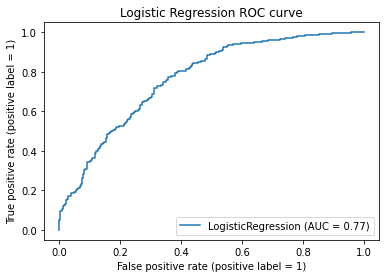

In [ ]:
### WRITE CODE HERE
from sklearn import metrics

# auc
# auc = roc_auc_score(y_val.iloc[:, 0], pred_lr)
# print('ROC AUC: %f' % auc)

# roc curve
metrics.RocCurveDisplay.from_estimator(best_fit,X_val,y_val.iloc[:, 0])

plt.xlabel('False positive rate (positive label = 1)')
plt.ylabel('True positive rate (positive label = 1)')
plt.title('Logistic Regression ROC curve')
plt.show()

Q14. Implement a function random_forest_model that returns a random forest model with the best paprameters. You will apply GridSearchCV to find the best parameters. The parameter search space is up to you. (Please set the random state of RandomForestClassifier to be 26.)

In [ ]:
def random_forest_model(X_train, y_train):
    rf = RandomForestClassifier(random_state=26) # Please set the random state to be 26
    ### YOUR CODE HERE ###
    param_grid = {
    'max_depth': [None,10,25],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,2,4],
    'min_samples_split': [2,4,6],
    'n_estimators': [25,50,100]
    }
    
    grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
    
    grid_search.fit(X_train,y_train)

    final=grid_search.best_estimator_
    return final # Return a logistic model with the best parameters you found and random_state=26

Q15. Fit the model by training set, obtain predictions on validation set and compute accuracy, precision, recall and F1 score.

In [ ]:
### WRITE CODE HERE
best_fit_rf = random_forest_model(X_train, y_train.iloc[:, 0])
best_fit_rf

Fitting 3 folds for each of 162 candidates, totalling 486 fits


RandomForestClassifier(max_depth=10, min_samples_leaf=4, random_state=26)

In [ ]:
pred_rf=best_fit_rf.predict(X_val)

In [ ]:
# accuracy
accuracy = accuracy_score(y_val.iloc[:, 0], pred_rf)
print(f'The accuracy is: {accuracy}')

# recall
recall = recall_score(y_val.iloc[:, 0], pred_rf)
print(f'The recall is: {recall}')

# precision
precision = precision_score(y_val.iloc[:, 0], pred_rf)
print(f'The precision is: {precision}')

# f1-score
f1 = f1_score(y_val.iloc[:, 0], pred_rf)
print(f'The f1 is: {f1}')

The accuracy is: 0.8110367892976589
The recall is: 0.9341252699784017
The precision is: 0.8398058252427184
The f1 is: 0.8844580777096115


Q16. Plot the ROC curve by giving appropriate names for title and axes.

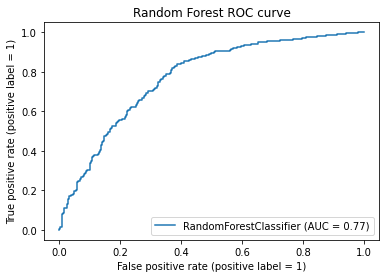

In [ ]:
metrics.RocCurveDisplay.from_estimator(best_fit_rf,X_val,y_val.iloc[:, 0])

plt.xlabel('False positive rate (positive label = 1)')
plt.ylabel('True positive rate (positive label = 1)')
plt.title('Random Forest ROC curve')
plt.show()

Q17: Which of the above 3 models (NN, Logistic function and random forest) worked best for you? Explain in details the reason for good/bad performance for each of the models?

***Ans:***

For the sake of comparing the models, we will use recall as the basis for comparison. This is because it is more important to capture the cases of credit defaults as it is more costly.

In this case, the model with the best recall score is the logistic function.

***Reasons for performance of each model:***
All three models had similar recall scores, differing by not more than 0.01.  The performance on other metrics are also not very significantly different.

Some reasons for the performance of the models could be as follows:

**Neural network:**
Neural networks are useful for modelling nonlinear data with large number of inputs. It is especially useful for use cases with many features. In this case, there are 82 features, and the model was able to perform relatively well.

However, neural networks might get stuck in the local minimum, which could potential be very different from the global minimum. Neural networks also depend a lot on training data. This leads to the problem of overfitting. In this situation, the problem doesn't seem to be very significant given the similar performance scores to the other models.

**Logistic function:**
The logistic model is less inclined to overfitting, which explains its marginally higher scores on the validation set.It also makes no assumptions of distribution of classes in feature space.

However, the regression assumes linearity between the dependent and independent variables, which may not always be true.

**Random forest:**
Random forest can handle large dataset efficiently. It can also work with nonlinear datasets. It also has methods for balancing errors in data sets where classes are imbalanced, such as when there are more observations that do not default than those that do.

However, random forest is prone to overfitting, and pruning is important. In this case, overfitting does not seem to be a major issue, given the similar performance scores with other models.



Using the best of the above 3 models, obtain predictions for the test set.

In [ ]:
### YOUR CODE HERE ###
y_pred = best_fit.predict(df_test3)

# Exercise 6

### Convolution Neural Netwrok

In neural networks, Convolutional neural network (ConvNets or CNNs) is one of the main categories to do images recognition, images classifications. Objects detections, recognition faces etc., are some of the areas where CNNs are widely used.

CNN models to train and test, each input image will pass it through a series of convolution layers with filters (Kernals), Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 

The dataset which we will use in this part is Fashion-MNIST classification dataset. This is a dataset of 60,000 28x28 pixel grayscale images of items of 10 types of clothing, along with a test set of 10,000 images.

The mapping of all 0-9 integers to class labels is listed below.

0: T-shirt/top<br>
1: Trouser<br>
2: Pullover<br>
3: Dress<br>
4: Coat<br>
5: Sandal<br>
6: Shirt<br>
7: Sneaker<br>
8: Bag<br>
9: Ankle boot<br>



In [ ]:
from keras.datasets import fashion_mnist
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)

(60000, 28, 28)


Create a plot of the first nine images in the training dataset.

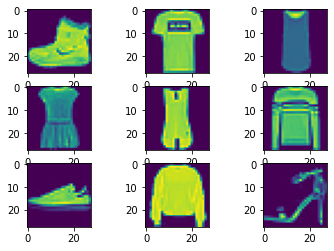

In [ ]:
import matplotlib.pyplot as plt
# plot first few images
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(x_train[i])
# show the figure
plt.show()

Q1. To process images in neural network, we have to indicate how may channels (depth) we are going to use. For instance, a coloful image from a standard digital camera will have a red, green and blue channel (RGB), so it has 3 channels (i.e. depth=3) in total, whereas a grayscale image only has 1 channel (depth=1). 

The Fashion-MNIST dataset is grayscale, and we can reshape Fashion-MNIST to have a single channel. (i.e., Convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1.)

In [ ]:
### YOUR CODE HERE ###
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

We know that the pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255.

Q2. Normalize the pixel values of grayscale images, e.g. rescale them to the range [0, 1]. 

In [ ]:
### YOUR CODE HERE ###
x_train = x_train / 255.0
x_test = x_test / 255.0

Q3. You also need to convert the target values into binary values (one-hot encoding).

In [ ]:
### YOUR CODE HERE ###
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Q4. Implement build_cnn_model() that returns a CNN model that takes an input of image, passes it to:
- A convolution layer with 32 filters and kernel size 5x5
- A MaxPool layer of size 2x2
- Another convolution layer with 64 filters and kernel size 5x5
- Another MaxPool layer of size 2x2
- Another convolution layer with 128 filters and kernel size 3x3
- Another MaxPool layer of size 2x2
- Flatten it
- Add one regular fully-connected layer of 128 units
- Finally, output your classification by another fully-connected layer, whose number of units is determined by yourself.

Our goal is to minimize the categorical_crossentropy loss.

As before, use the "relu" activation function for all the convolution/full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
def build_cnn_model():
    model = Sequential()
    ### YOUR CODE HERE ###

    model.add(Conv2D(32, (5,5), input_shape = (28, 28, 1)))

    model.add(MaxPool2D(2, 2))

    model.add(Conv2D(64, (5,5)))

    model.add(MaxPool2D(2, 2))

    model.add(Conv2D(128, (3, 3)))

    model.add(MaxPool2D((2, 2)))

    model.add(Flatten())

    model.add(Dense(128, activation = 'relu'))

    model.add(Dense(10, activation = 'softmax'))
   
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model = build_cnn_model()

Q5. Fit your CNN model by x_train, y_train

In [ ]:
### YOUR CODE HERE ###
model = build_cnn_model()

model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4857 - accuracy: 0.8213
Epoch 2/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.3223 - accuracy: 0.8821
Epoch 3/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2758 - accuracy: 0.8988
Epoch 4/10
1875/1875 [==============================] - 77s 41ms/step - loss: 0.2405 - accuracy: 0.9104
Epoch 5/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.2126 - accuracy: 0.9193
Epoch 6/10
1875/1875 [==============================] - 73s 39ms/step - loss: 0.1881 - accuracy: 0.9285
Epoch 7/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1724 - accuracy: 0.9353
Epoch 8/10
1875/1875 [==============================] - 72s 39ms/step - loss: 0.1517 - accuracy: 0.9426
Epoch 9/10
1875/1875 [==============================] - 74s 39ms/step - loss: 0.1412 - accuracy: 0.9459
Epoch 10/10
1875/1875 [==============================] - 73s 39m

Q6. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
loss, acc = model.evaluate(x_test, y_test)
print(f"Entropy Loss is {loss:.3f}")
print(f"Accuracy is {acc:.3f}")

313/313 [==============================] - 4s 12ms/step - loss: 0.3587 - accuracy: 0.8969
Entropy Loss is 0.359
Accuracy is 0.897


Q7. Now let's check the performance of multi-layer perceptrons (MLP) in image classfication. Implement build_mlp_model() that returns a MLP model that takes an input of image, passes it to 1 Flatten layer then 3 full-connected layers and the final fully-connected readout layer.

The number of units in each full-connected layer is determined by yourself. 

As before, use the "relu" activation function for the first 2 full-connected layers, but use the "softmax" activation for the final fully-connected layer (readout layer).

The optimizer and loss function have been filled in for you.

In [ ]:
def build_mlp_model():
    model = Sequential()
    ### YOUR CODE HERE ###
    model.add(Flatten())
    model.add(Dense(300, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(10, activation='softmax'))
   
    ######################
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

    return model

model2 = build_mlp_model()

Q8. Fit your MLP model by x_train, y_train. (Please use the same parameters as those in CNN model for comparison)

In [ ]:
### YOUR CODE HERE ###
model = build_mlp_model()
model.fit(x_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4758 - accuracy: 0.8278
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3590 - accuracy: 0.8673
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3243 - accuracy: 0.8792
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3018 - accuracy: 0.8882
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2823 - accuracy: 0.8945
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2696 - accuracy: 0.9004
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2577 - accuracy: 0.9035
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2420 - accuracy: 0.9092
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2356 - accuracy: 0.9111
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.

Q9. Evaluate your model on test set and print out the entropy loss and the accuracy

In [ ]:
### YOUR CODE HERE ###
loss, acc = model.evaluate(x_test, y_test)
print(f"Entropy Loss is {loss:.3f}")
print(f"Accuracy is {acc:.3f}")

313/313 [==============================] - 1s 3ms/step - loss: 0.3370 - accuracy: 0.8871
Entropy Loss is 0.337
Accuracy is 0.887


Q10. Which of the above 2 models worked best for you? Explain in details the reason for good/bad performance for each of the models.

Ans - 
The first model (CNN) worked best, given it has a better accuracy score and lower entropy loss.

Explanation:
MLP includes too many parameters because it is fully connected, resulting in redundancy and inefficiency. This leads to overfitting and reduces its performance on the test set.

Spatial information is also lost when the image is flattened(matrix to vector) into an MLP.

On the other hand, CNN automatically detects the important features of the images. It is able to develop an internal representation of a image to learn position and scale in variant structures in the data, making it excellent for identifying image categories.



# Exercise 7
### Autoencoder

So far, we have learned a lot about how to use neural networks in supervised learning, but in fact there are also many applications of neural networks in unsupervised learning such as autoencoder.

An autoencoder is a special type of neural network that is trained to copy its input to its output. For example, given an image of a handwritten digit, an autoencoder first encodes the image into a lower dimensional latent representation, then decodes the latent representation back to an image. An autoencoder learns to compress the data while minimizing the reconstruction error.

In this part, we will continue using Fashion-MNIST dataset.

Q1. Implement an autoencoder model that takes an input of 28x28x1 images, compress them into (4,) vectors by an econder, and then decompress them back to 28x28 images by a decoder. In other words, the orginal dimensionality is 784 (=28x28), but we want to compress it into the dimensionality of 4 by an encoder, then reconstruct these (4,) vectors back to 28x28 images by an decoder. 

You only need to define an encoder and a decoder. In your encoder, you need to inlude a flatten layer and several fully-connected layers, while in your decoder, you are required to use fully-connected layers and one reshape layer. Do not use other types of layers.

You will determine the number of fully-connected layers, number of units, and activation functions by yourself.

The optimizer and loss function have been filled in for you.

In [ ]:
from keras.models import Model
from keras.layers import Reshape, Input

# encoder layers
encoding_dim = 4
encoded = Sequential()
# You don't need to build a new function, just add the layers
### YOUR CODE HERE ###
encoded.add(Flatten())
encoded.add(Dense(784, activation='relu'))
encoded.add(Dense(512, activation='relu'))
encoded.add(Dense(256, activation='relu'))
encoded.add(Dense(50, activation='relu'))
encoded.add(Dense(encoding_dim, activation='relu'))



######################

# decoder layers
decoded = Sequential()
### YOUR CODE HERE ###
decoded.add(Dense(encoding_dim, activation = 'relu'))
decoded.add(Dense(50, activation = 'relu', input_shape = (4,)))
decoded.add(Dense(256, activation = 'relu'))
decoded.add(Dense(512, activation = 'relu'))
decoded.add(Dense(784, activation = 'relu'))
decoded.add(Reshape((28, 28)))

######################
img_x, img_y = 28, 28
input_x = Input(shape=(img_x, img_y, 1))
code = encoded(input_x)
output = decoded(code)

autoencoder = Model(input_x,output)

autoencoder.compile(optimizer='adam', loss='mse')

Q2. Fit your model by x_train only

In [ ]:
### YOUR CODE HERE ###
autoencoder.fit(x_train, x_train, epochs = 10, batch_size = 32)

Epoch 1/10
1875/1875 [==============================] - 47s 24ms/step - loss: 0.0453
Epoch 2/10
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0309
Epoch 3/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0276
Epoch 4/10
1875/1875 [==============================] - 42s 23ms/step - loss: 0.0256
Epoch 5/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0251
Epoch 6/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0247
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0240
Epoch 8/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0234
Epoch 9/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.0231
Epoch 10/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0230


Q3. Evaluate your model on test set and print out the MSE and output images as numpy arrays.

In [ ]:
# Test your autoencoder on test set, print out the MSE
### YOUR CODE HERE ###
eval = autoencoder.evaluate(x_test, x_test)
print(f"MSE is {eval:.3f}")

######################
# output images as numpy arrays
encoded_imgs = encoded(x_test).numpy()
decoded_imgs = decoded(encoded_imgs).numpy()

313/313 [==============================] - 2s 7ms/step - loss: 0.0229
MSE is 0.023


Plot your encoded image

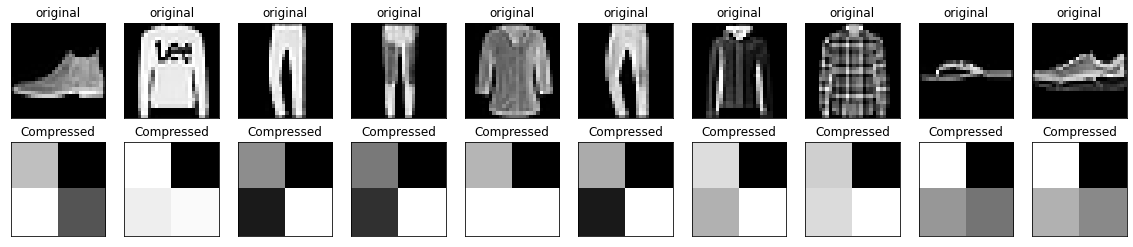

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(encoded_imgs[i].reshape(2,2))
  plt.title("Compressed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

Plot your decoded image

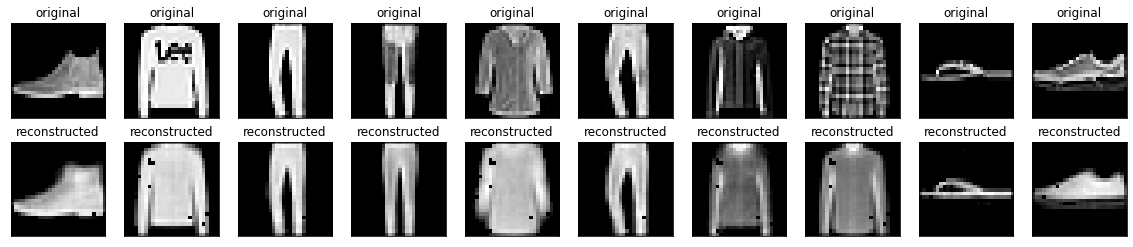

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()